<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-the-stocks" data-toc-modified-id="Loading-the-stocks-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading the stocks</a></span></li><li><span><a href="#Getting-the-AI-started" data-toc-modified-id="Getting-the-AI-started-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Getting the AI started</a></span><ul class="toc-item"><li><span><a href="#Regression" data-toc-modified-id="Regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Regression</a></span></li></ul></li></ul></div>

# AI Part

In [20]:
# cell for autoreload includes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the stocks

In [21]:
from src.stocks import Stocks
# The warnings are due to the includes in the file

We define the schema of the datas contained in files

In [22]:
from pyspark.sql.types import DoubleType, StringType, DateType, StructType, StructField

In [23]:
data_schema = StructType([
    StructField('Date', DateType(), True),
    StructField('High', DoubleType(), True),
    StructField('Low', DoubleType(), True),
    StructField('Open', DoubleType(), True),
    StructField('Close', DoubleType(), True),
    StructField('Volume', DoubleType(), True),
    StructField('Adj Close', DoubleType(), True),
    StructField('company_name', StringType(), True)
])

We load all the stocks:

In [24]:
stocks = Stocks(header=True, delimiter=',', schema=data_schema)

We show an exemple of stock with all the indicators:

In [25]:
stocks.stocks[0].predict.fullDF.show(4)

22/06/16 22:05:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:05:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:05:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:05:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------+------------------+------------------+------------------+------------------+----------+------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+--------------------+--------------------+
|      Date|              High|               Low|              Open|             Close|    Volume|         Adj Close|        next_Close|               CCI|               roc|           momentum|    R_de_williams|             BB_MM|             BB_UB|             BB_LB|             KB_MM|             KB_UB|             KB_LB|                 DPO|                BOF|moving_average_Close|    daily_return_day|
+----------+------------------+------------------+------------------+------------------+----------+------------------+------------------+------------------+------------------+---

## Linear Regression

Using our estimators, we predict the next value of "Close":

In [10]:
stocks.call_prediction_function("print_linear_regression")

###########################
########## APPLE ##########
###########################



22/06/16 21:51:12 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:51:12 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:51:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:51:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+------------------+------------------+
|        next_Close|   pred_next_Close|
+------------------+------------------+
|29.747499465942383|29.324985539709928|
|29.760000228881836|29.602121384188756|
|29.997499465942383| 29.96149670596524|
|30.469999313354492|29.934627550577055|
| 32.13249969482422| 33.28969007325725|
|  33.0099983215332|32.912387410419065|
|33.837501525878906|  33.8742080418958|
| 34.23249816894531| 34.08051197146717|
| 34.79999923706055| 34.73268871332793|
|34.747501373291016| 34.82372164688834|
|  35.1150016784668| 34.63726941619467|
|34.997501373291016|35.205089976785125|
|34.959999084472656| 35.44196359848243|
|35.220001220703125| 35.05223777553716|
|36.005001068115234| 36.19461534620129|
| 35.45750045776367| 35.15729526466323|
|  35.9474983215332| 35.89581963116518|
|38.189998626708984| 38.56659962285723|
|35.567501068115234|35.919268348378196|
|36.407501220703125|36.181888549084675|
+------------------+------------------+
only showing top 20 rows

##############

22/06/16 21:51:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:51:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:51:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:51:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+------------------+------------------+
|        next_Close|   pred_next_Close|
+------------------+------------------+
| 124.9000015258789|122.87315777755451|
|128.33999633789062|126.31536950872446|
|127.91999816894531|127.74641872277249|
|131.47999572753906|129.83301900800538|
|130.83999633789062| 132.5631660946703|
| 134.1999969482422| 132.3153551277319|
|133.83999633789062|133.84033973305384|
|136.41000366210938|135.67657221838942|
|139.60000610351562|  138.644990729989|
|139.32000732421875| 139.6451638359328|
|139.72000122070312|139.17324561126267|
|139.83999633789062|139.99555187957188|
|138.50999450683594|140.04132513884818|
|140.32000732421875|140.65599080816813|
|141.85000610351562|141.71832109213148|
| 141.4199981689453|140.07171120879548|
| 147.6999969482422|146.80717222192754|
| 151.4600067138672|152.71134362721673|
|150.63999938964844| 149.5836437931909|
|153.39999389648438|154.00551468950476|
+------------------+------------------+
only showing top 20 rows

##############

22/06/16 21:51:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:51:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:51:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:51:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+------------------+------------------+
|        next_Close|   pred_next_Close|
+------------------+------------------+
| 46.25600051879883| 44.87306196747059|
| 47.54999923706055| 45.16694546159308|
|47.672000885009766| 46.74941612469897|
| 50.89400100708008| 51.60029680255833|
|50.310001373291016| 50.31083894059532|
| 52.41600036621094|51.788039788658935|
|53.790000915527344|56.568622240518046|
| 49.24599838256836|50.579588598268714|
| 49.23400115966797| 49.31575086319445|
|51.599998474121094| 49.80571054926931|
|51.145999908447266|51.525980435630686|
| 52.29999923706055|52.829145647673855|
| 50.13600158691406|  53.1047320858184|
| 54.04399871826172|52.999739834482966|
|              59.0| 62.05860461839583|
| 60.28799819946289| 60.70318132253567|
| 61.72600173950195|62.351492933551356|
|  68.2020034790039| 67.68039061150871|
| 74.27999877929688| 74.93029107945665|
| 76.52200317382812|  75.7818776914941|
+------------------+------------------+
only showing top 20 rows

##############

22/06/16 21:51:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:51:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:51:28 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:51:28 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+-----------------+------------------+
|       next_Close|   pred_next_Close|
+-----------------+------------------+
|62.63999938964844| 63.16748867075662|
|62.70000076293945| 62.84572546204492|
|             62.5|62.584029164108486|
|63.68000030517578| 63.79544686048002|
|63.16999816894531| 63.77304635552268|
|63.34000015258789| 63.20850146389017|
| 64.5199966430664| 64.84687766994885|
| 64.2300033569336|  64.7405044242243|
|64.70999908447266| 65.32723597641927|
|64.41000366210938| 65.26600145949445|
|            64.75| 64.63499896656707|
|64.87000274658203|  64.9020523594778|
|64.20999908447266|  65.4223467741082|
| 65.0999984741211| 65.36327145386285|
|65.55999755859375| 66.03596527846045|
| 65.4800033569336|  65.2564734526845|
| 68.2699966430664| 68.06826656675355|
|69.83999633789062| 70.66871917190028|
|             70.0| 69.95251836437615|
|70.26000213623047| 70.52494220564958|
+-----------------+------------------+
only showing top 20 rows

############################
#########

22/06/16 21:51:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:51:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:51:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:51:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+-----------------+-----------------+
|       next_Close|  pred_next_Close|
+-----------------+-----------------+
|806.6500244140625|807.7372433807021|
|807.8800048828125|806.4197760812422|
|806.0700073242188|805.2244846034253|
|835.6699829101562|825.3460841706785|
| 798.530029296875|793.4885777163566|
|808.3800048828125|810.0321515938703|
|824.1599731445312|823.2118950260925|
| 829.280029296875|829.5207571034452|
|845.5399780273438| 846.317140663973|
|845.6199951171875|851.0022203355221|
|847.2000122070312|848.7647973047225|
|852.1199951171875|851.3266553680351|
|830.4600219726562|849.6607202991539|
| 819.510009765625|815.0408115372717|
|831.4099731445312| 835.072518744517|
|837.1699829101562|826.3675582816576|
|           874.25|870.2863826996321|
|964.8599853515625|975.3095206832935|
| 939.780029296875|941.8916345838812|
|957.0900268554688|960.2761425002304|
+-----------------+-----------------+
only showing top 20 rows

##########################
########## ZOOM ##########
########

22/06/16 21:51:36 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:51:36 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:51:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:51:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+-----------------+-----------------+
|       next_Close|  pred_next_Close|
+-----------------+-----------------+
|             65.0|59.52976413184498|
|72.76000213623047|72.96950450487958|
|79.18000030517578| 74.9152077707464|
|79.62999725341797|75.83137200422556|
|84.66999816894531|89.11008084859252|
|            76.25|78.20029934793365|
|78.73999786376953|73.53384769529285|
|102.7699966430664|88.37860378604802|
|86.33000183105469|86.06410595511358|
| 90.2699966430664|87.56423323793386|
|88.79000091552734|  91.308431516054|
|85.12999725341797|   89.11929893027|
|91.87999725341797| 90.5705029397847|
| 91.4000015258789|97.25842606663241|
|96.66999816894531|91.60358458929143|
|95.51000213623047|94.44728842595501|
|92.16000366210938|94.32218395764583|
| 78.8499984741211|82.81153787710925|
|75.80999755859375|75.89343980408734|
|76.98999786376953|76.20242298293206|
+-----------------+-----------------+
only showing top 20 rows

############################
########## AMAZON ##########
####

22/06/16 21:51:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:51:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:51:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:51:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+------------------+------------------+
|        next_Close|   pred_next_Close|
+------------------+------------------+
| 796.9199829101562| 797.5207233345959|
| 817.1400146484375| 814.6230868392795|
|   807.47998046875| 809.8364727687565|
|   836.52001953125| 825.3601687359912|
| 839.9500122070312| 833.8878768268946|
| 819.7100219726562| 810.9776065049907|
| 844.1400146484375| 844.1019856455354|
| 848.6400146484375| 842.7487911742392|
| 854.5900268554688| 859.1108895495504|
|  852.530029296875| 861.9941050199325|
|  852.969970703125| 854.7307910740803|
| 852.3099975585938| 857.5619418798213|
| 843.2000122070312| 863.9801457852873|
| 846.8200073242188| 843.1593706614065|
|  909.280029296875| 910.4768636977017|
|  901.989990234375| 886.5476296022607|
| 918.3800048828125|  921.165356090864|
| 994.6199951171875|1002.9844216802701|
| 987.7100219726562|  964.861308968873|
|1001.2999877929688|1008.6917795831602|
+------------------+------------------+
only showing top 20 rows



We plot the result:

###########################
########## APPLE ##########
###########################



22/06/16 21:49:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:12 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:12 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 2

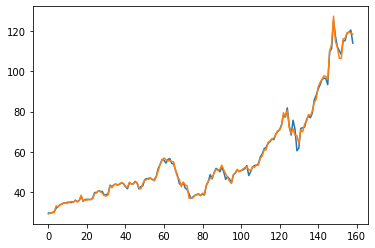

##############################
########## FACEBOOK ##########
##############################



22/06/16 21:49:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 2

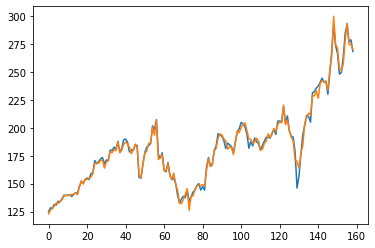

###########################
########## TESLA ##########
###########################



22/06/16 21:49:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:29 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:29 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 2

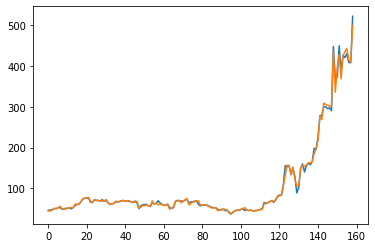

###############################
########## MICROSOFT ##########
###############################



22/06/16 21:49:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 2

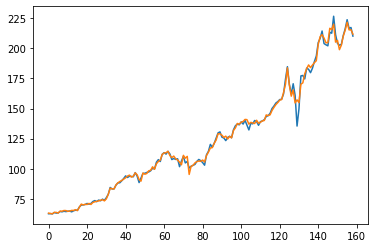

############################
########## GOOGLE ##########
############################



22/06/16 21:49:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:44 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:44 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 2

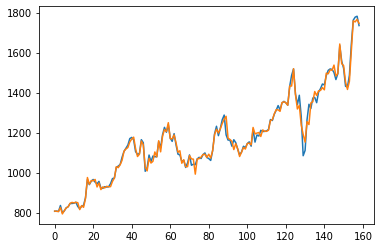

##########################
########## ZOOM ##########
##########################



22/06/16 21:49:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 2

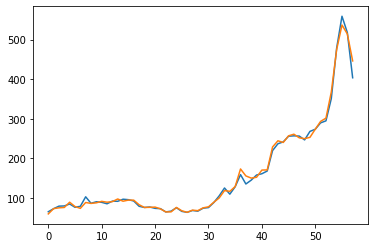

############################
########## AMAZON ##########
############################



22/06/16 21:49:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:49:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:50:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 21:50:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 2

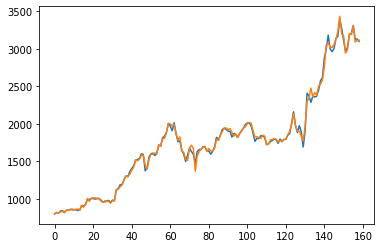

In [9]:
stocks.call_prediction_function("plot_linear_regression")

Percent of good prediction of up/down:

In [32]:
stocks.call_prediction_function("percent_good_up_down")

###########################
########## APPLE ##########
###########################



22/06/16 22:25:45 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:45 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:45 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:45 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 2

Percent of good prediction of UP/DOWN : 0.4716981132075472%
##############################
########## FACEBOOK ##########
##############################



22/06/16 22:25:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 2

Percent of good prediction of UP/DOWN : 0.5157232704402516%
###########################
########## TESLA ##########
###########################



22/06/16 22:25:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:51 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:51 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 2

Percent of good prediction of UP/DOWN : 0.5723270440251572%
###############################
########## MICROSOFT ##########
###############################



22/06/16 22:25:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:53 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:53 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 2

Percent of good prediction of UP/DOWN : 0.5408805031446541%
############################
########## GOOGLE ##########
############################



22/06/16 22:25:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 2

Percent of good prediction of UP/DOWN : 0.5849056603773585%
##########################
########## ZOOM ##########
##########################



22/06/16 22:25:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 2

Percent of good prediction of UP/DOWN : 0.5344827586206896%
############################
########## AMAZON ##########
############################



22/06/16 22:25:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:25:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:26:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:26:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 2

Percent of good prediction of UP/DOWN : 0.5974842767295597%


Plot how much we won/lost:

###########################
########## APPLE ##########
###########################



22/06/16 22:38:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:38:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:38:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:38:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Figure size 2160x720 with 0 Axes>

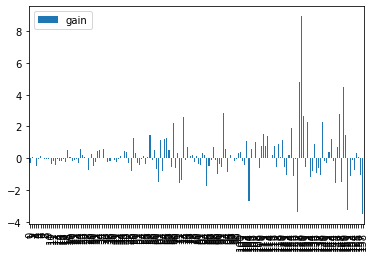

##############################
########## FACEBOOK ##########
##############################



22/06/16 22:38:29 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:38:29 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:38:30 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:38:30 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Figure size 2160x720 with 0 Axes>

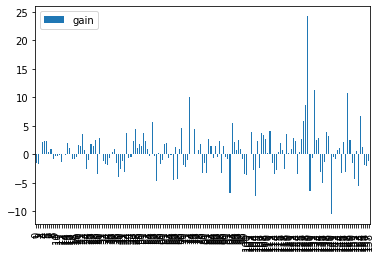

###########################
########## TESLA ##########
###########################



22/06/16 22:38:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:38:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:38:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:38:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Figure size 2160x720 with 0 Axes>

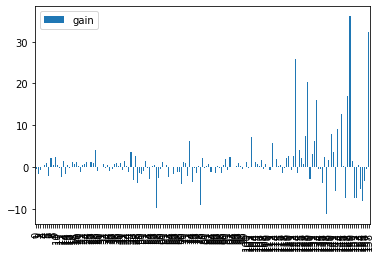

###############################
########## MICROSOFT ##########
###############################



22/06/16 22:38:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:38:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:38:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:38:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Figure size 2160x720 with 0 Axes>

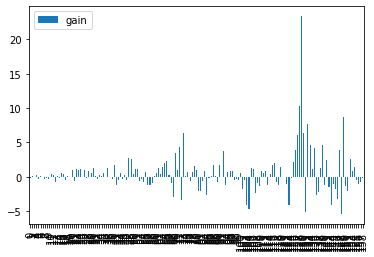

############################
########## GOOGLE ##########
############################



22/06/16 22:38:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:38:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:38:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:38:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Figure size 2160x720 with 0 Axes>

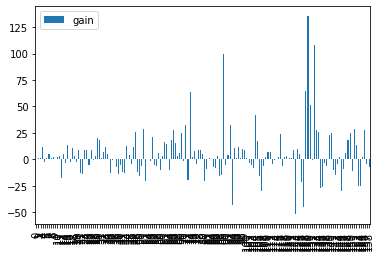

##########################
########## ZOOM ##########
##########################



22/06/16 22:38:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:38:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:38:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:38:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Figure size 2160x720 with 0 Axes>

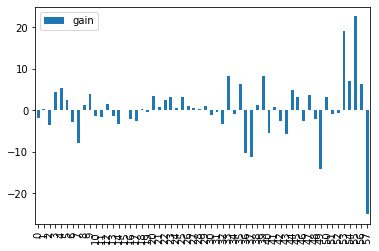

############################
########## AMAZON ##########
############################



22/06/16 22:38:44 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:38:44 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:38:44 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:38:44 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Figure size 2160x720 with 0 Axes>

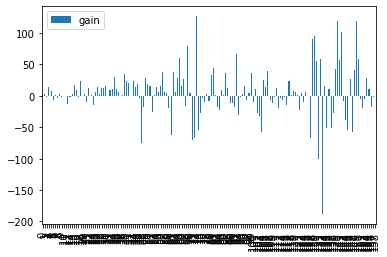

In [41]:
stocks.call_prediction_function("plot_gain_predict")

Print how much we made:

In [56]:
stocks.call_prediction_function("print_stonks_or_not")

###########################
########## APPLE ##########
###########################



22/06/16 22:49:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:49:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:49:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:49:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:49:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:49:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 2

With an initial buy at 29.477500915527344$ we won 19.857498168945312$
##############################
########## FACEBOOK ##########
##############################



22/06/16 22:49:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:49:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


With an initial buy at 123.41000366210938$ we won 65.08991241455078$
###########################
########## TESLA ##########
###########################



22/06/16 22:50:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:02 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:02 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 2

With an initial buy at 45.801998138427734$ we won 156.17198944091797$
###############################
########## MICROSOFT ##########
###############################



22/06/16 22:50:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 2

With an initial buy at 62.84000015258789$ we won 75.46005249023438$
############################
########## GOOGLE ##########
############################



22/06/16 22:50:05 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:05 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:05 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 2

With an initial buy at 806.1500244140625$ we won 636.5150146484375$
##########################
########## ZOOM ##########
##########################



22/06/16 22:50:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:09 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:09 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 2

With an initial buy at 63.20000076293945$ we won 15.029926300048828$
############################
########## AMAZON ##########
############################



22/06/16 22:50:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:12 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 22:50:12 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/16 2

With an initial buy at 795.989990234375$ we won 693.3997802734375$
